In [1]:
## 와인 예측
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [2]:
df = pd.read_csv('./data/wine.csv', header= None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, shuffle=True)


In [7]:
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 8)                 248       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.25)

Epoch 1/50
122/122 [==============================] - 1s 4ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0915 - val_accuracy: 0.9715
Epoch 2/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0876 - val_accuracy: 0.9738
Epoch 3/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9802 - val_loss: 0.0852 - val_accuracy: 0.9746
Epoch 4/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0915 - val_accuracy: 0.9715
Epoch 5/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9820 - val_loss: 0.1204 - val_accuracy: 0.9692
Epoch 6/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0981 - val_accuracy: 0.9738
Epoch 7/50
122/122 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0969 - val_accuracy: 0.9746
Epoch 

In [10]:
hist.history

{'loss': [0.07078945636749268,
  0.059716761112213135,
  0.059364888817071915,
  0.057696931064128876,
  0.055971018970012665,
  0.05795975401997566,
  0.06110548973083496,
  0.06484188884496689,
  0.0590943768620491,
  0.053407009690999985,
  0.058659132570028305,
  0.05393969640135765,
  0.055064212530851364,
  0.060282785445451736,
  0.05714401602745056,
  0.052519265562295914,
  0.06001732870936394,
  0.0560561828315258,
  0.05530313774943352,
  0.05484255030751228,
  0.057181477546691895,
  0.05344230681657791,
  0.05627159774303436,
  0.05350835248827934,
  0.05149844288825989,
  0.04990534856915474,
  0.05440548062324524,
  0.06363353133201599,
  0.06271743029356003,
  0.053535476326942444,
  0.05175650492310524,
  0.05836411193013191,
  0.05002550035715103,
  0.05484499782323837,
  0.052602868527173996,
  0.05010026693344116,
  0.04972592368721962,
  0.060062751173973083,
  0.05054822564125061,
  0.0581568144261837,
  0.052635401487350464,
  0.050681497901678085,
  0.0473911166

In [5]:
## 모델 업데이트 하면서 모델 학습 실행
from tensorflow.keras.callbacks import ModelCheckpoint


In [12]:
filename = './data/model/{epoch:02d} - {val_accuracy:4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=filename, verbose=1)

In [13]:
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model\01 - 0.976154.hdf5

Epoch 2: saving model to ./data/model\02 - 0.978462.hdf5

Epoch 3: saving model to ./data/model\03 - 0.979231.hdf5

Epoch 4: saving model to ./data/model\04 - 0.970000.hdf5

Epoch 5: saving model to ./data/model\05 - 0.976923.hdf5

Epoch 6: saving model to ./data/model\06 - 0.976154.hdf5

Epoch 7: saving model to ./data/model\07 - 0.975385.hdf5

Epoch 8: saving model to ./data/model\08 - 0.976923.hdf5

Epoch 9: saving model to ./data/model\09 - 0.976154.hdf5

Epoch 10: saving model to ./data/model\10 - 0.976154.hdf5

Epoch 11: saving model to ./data/model\11 - 0.976154.hdf5

Epoch 12: saving model to ./data/model\12 - 0.974615.hdf5

Epoch 13: saving model to ./data/model\13 - 0.978462.hdf5

Epoch 14: saving model to ./data/model\14 - 0.976154.hdf5

Epoch 15: saving model to ./data/model\15 - 0.977692.hdf5

Epoch 16: saving model to ./data/model\16 - 0.978462.hdf5

Epoch 17: saving model to ./data/model\17 - 0.979231.hdf5

Epoch

In [14]:
score = model.evaluate(X_test,y_test)
print('test accuracy: ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9777
test accuracy:  0.9776923060417175


In [8]:
#모델 학습을 2000회 실행
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#hist = model.fit(X_train, y_train, epochs=2000, validation_split=0.25, verbose=0, callbacks=[checkpointer])

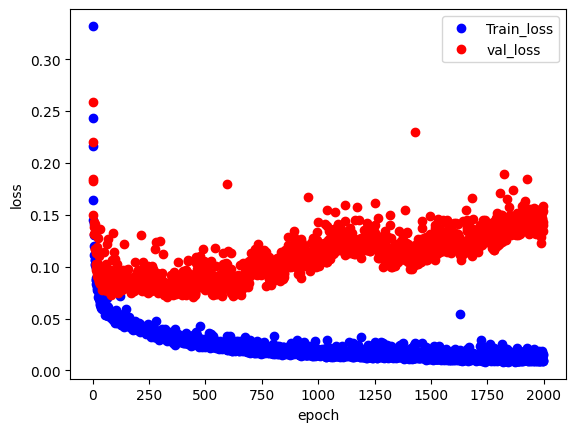

In [20]:
import matplotlib.pyplot as plt
import numpy as np

hist_df = pd.DataFrame(hist.history)
hist_df.head()

y_loss = hist_df['loss']
y_vloss = hist_df['val_loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, 'o', c= 'blue', label = 'Train_loss')
plt.plot(x_len, y_vloss, 'o', c= 'red', label = 'val_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [6]:
## 중단 함수를 이용해서 최상의 모델을 찾음
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)

model_name = './data/model/wine_bestmodel.hdf5'
checkpointer = ModelCheckpoint(filepath = model_name, monitor= 'val_loss', verbose=0,save_best_only=True)



In [9]:
hist = model.fit(X_train, y_train, epochs= 2000, batch_size= 500, validation_split=0.25, callbacks=[early_stopping,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 51ms/step - loss: 7.5751 - accuracy: 0.2325 - val_loss: 2.5845 - val_accuracy: 0.2377
Epoch 2/2000
8/8 [==============================] - 0s 13ms/step - loss: 1.2073 - accuracy: 0.5666 - val_loss: 0.7820 - val_accuracy: 0.7869
Epoch 3/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.9796 - accuracy: 0.7829 - val_loss: 0.8680 - val_accuracy: 0.8169
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.8765 - accuracy: 0.8265 - val_loss: 0.5461 - val_accuracy: 0.8777
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4407 - accuracy: 0.8907 - val_loss: 0.2424 - val_accuracy: 0.8954
Epoch 6/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3236 - accuracy: 0.8560 - val_loss: 0.2242 - val_accuracy: 0.9054
Epoch 7/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2614 - accuracy: 0.9181 - val_loss: 0.2273 - val_accuracy: 0.9362
Epoch 8/2000


In [10]:
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9792
Test accuracy :  0.9792307615280151
